In [1]:
%matplotlib notebook


<IPython.core.display.Javascript object>


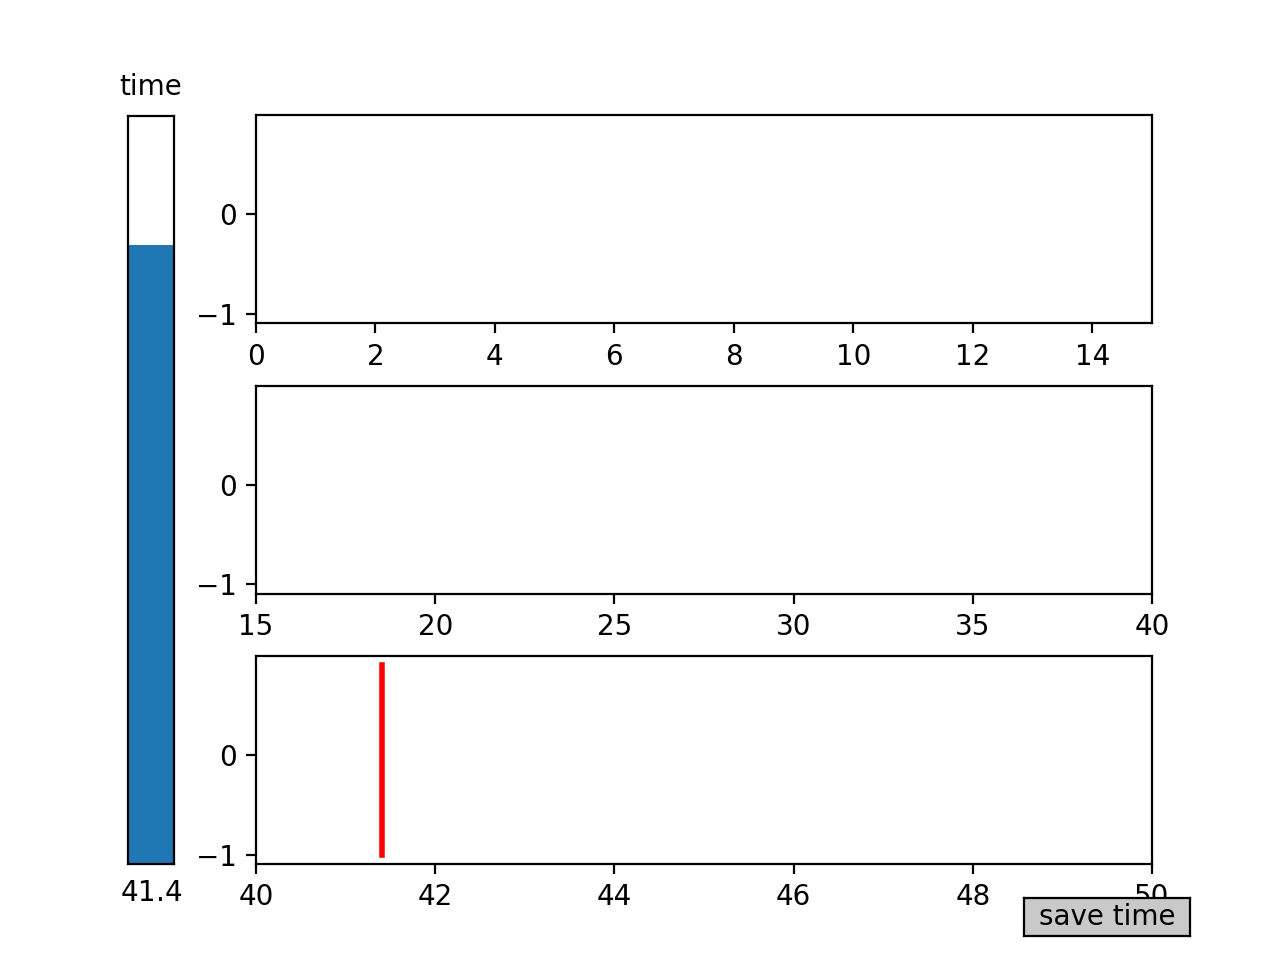

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

fig, ax = plt.subplots(3,1)
plt.subplots_adjust(left=0.2, bottom=0.1, hspace = 0.3)

test_list = []
s0 = 0

t1 = np.arange(-1, 1, 0.1)
t2 = np.arange(-1, 1, 0.1)
t2 = np.arange(-1, 1, 0.1)

s1 = s0*np.ones(np.shape(t1))
s2 = s0*np.ones(np.shape(t2))
s3 = s0*np.ones(np.shape(t2))

l1 = ax[0].plot(s1, t1, lw=2, color='red')[0]
l2 = ax[1].plot(s2, t2, lw=2, color='red')[0]
l3 = ax[2].plot(s2, t2, lw=2, color='red')[0]



ax[0].set_xlim(0,15)
ax[1].set_xlim(15,40)
ax[2].set_xlim(40,50)

axtime = plt.axes([0.1, 0.1, 0.036, 0.779])
stime = Slider(axtime, 'time', 0, 50., valinit=s0, orientation="vertical")

def update(val):
    l1.set_xdata(val*np.ones(np.shape(t1)))
    l2.set_xdata(val*np.ones(np.shape(t2)))
    l3.set_xdata(val*np.ones(np.shape(t2)))

    fig.canvas.draw_idle()

stime.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.13, 0.04])
button = Button(resetax, 'save time', color='0.97', hovercolor='0.79')

def save(event):
    test_list.append(stime.val)
    print(test_list)
    
    #print("Amplitude: ",  sfreq.val)

button.on_clicked(save)

plt.show()

In [149]:
print(test_list)

[41.40675144415917, 41.40675144415917]


<IPython.core.display.Javascript object>


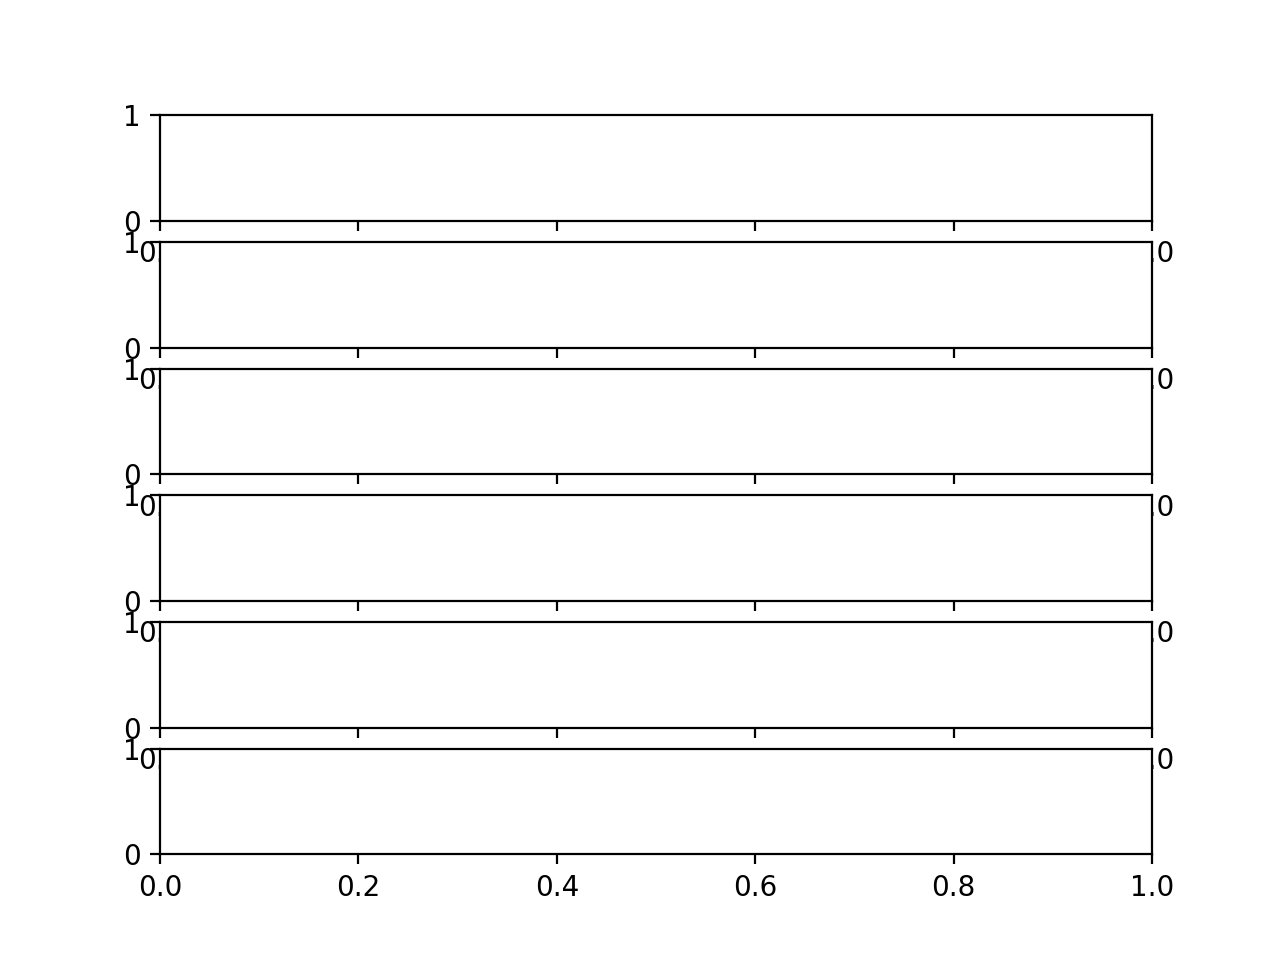

In [150]:
fig, ax = plt.subplots(nrows = 6)
plt.show()


<IPython.core.display.Javascript object>


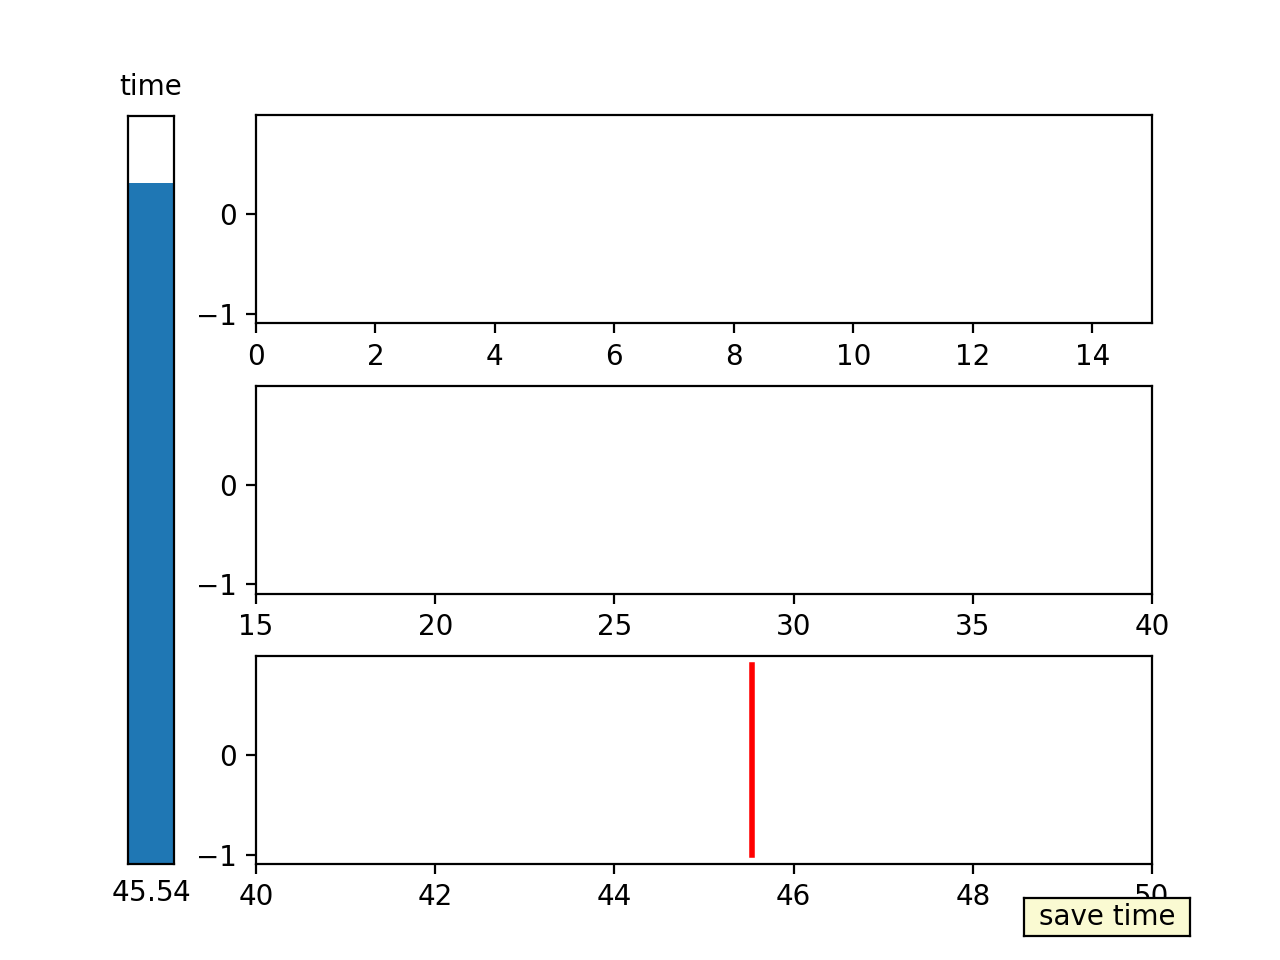

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

transits = 3
fig, ax = plt.subplots(nrows = transits)
plt.subplots_adjust(left=0.2, bottom=0.1, hspace = 0.3)

problem_times = []

t_init = 0

ts=[]
ys=[]
ls=[]
tvals = [[0,15],[15,40],[40,50]]
for ii in range(0, transits):
    tmin,tmax = tvals[ii]
    
    y=np.arange(-1, 1, 0.1)
    ys.append(y)

    t = t_init*np.ones(np.shape(y))
    ts.append(t)

    ls.append(ax[ii].plot(ts[ii], ys[ii], lw=2, color='red')[0])


    ax[ii].set_xlim(tmin,tmax)


axtime = plt.axes([0.1, 0.1, 0.036, 0.779])
stime = Slider(axtime, 'time', 0, 50., valinit=s0, orientation="vertical")

def update(val):
    for ii in range(0, transits):
        ls[ii].set_xdata(val*np.ones(np.shape(ys[ii])))


    fig.canvas.draw_idle()

stime.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.13, 0.04])
button = Button(resetax, 'save time', color=axcolor, hovercolor='0.975')

def save(event):
    if stime.val not in problem_times:
        problem_times.append(stime.val)


button.on_clicked(save)

plt.show()

In [145]:
print(problem_times)

[45.53530835472827]
